In [2]:
library(tidyverse)
library(ComplexHeatmap)
library(ggVennDiagram)
library(ggplot2)
library(dplyr)
library(ggvenn)
library(gridExtra)

In [3]:
df = read_csv('/home/fer/Documents/cfDNA/OncoV6/CNV_count.csv')
head(df)

New names:
• `` -> `...1`
Rows: 24 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): ...1, TumorType_cfDNA, TumorType_Tumor, Stage, Status
dbl (2): Count_cfDNA, Count_tumor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Count_cfDNA,Count_tumor,TumorType_cfDNA,TumorType_Tumor,Stage,Status
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
UEB-0205,NA,5,Treated Tumor,Primary tratment-naive tumor,I,Paired
UEB-0208,1,3,Primary tratment-naive tumor,Primary tratment-naive tumor,I,Paired
UEB-0209,8,16,Treated Tumor,Primary tratment-naive tumor,II,Paired
UEB-0210,14,6,Treated Tumor,Treated Tumor,II,Paired
UEB-0211,7,12,Treated Tumor,Treated Tumor,III,Paired
UEB-0212,NA,18,Unknown,Primary tratment-naive tumor,I,Unpaired


In [4]:
df <-df[order(  df$Status,df$Count_cfDNA, df$Count_tumor),]

In [5]:
cf <- na.omit(df$Count_cfDNA)
mean(cf)/max(cf)

[1] 0.3114286

In [6]:
tum <- df$Count_tumor

tm_p = tum[1:14]
tm_p <- na.omit(tm_p)

tm_t = tum[15:24]
tm_t <- na.omit(tm_t)


mean(tm_p)/max(tm_p)
mean(tm_p)

mean(tm_t)/max(tm_t)
mean(tm_t)

[1] 0.4821429

[1] 7.714286

[1] 0.5

[1] 9

In [7]:
mat = as.matrix(df)
rownames(mat) = mat[, 1]
m = as.matrix(mat[, 4])
colnames(m) = c('Sample Type cfDNA')
head(m)

,Sample Type cfDNA
UEB-0208,Primary tratment-naive tumor
UEB-0221,Primary tratment-naive tumor
UEB-0226,Primary tratment-naive tumor
UEB-0223,Primary tratment-naive tumor
UEB-0213,Primary tratment-naive tumor
UEB-0215,Primary tratment-naive tumor


In [8]:
cfDNA = as.list(df$Count_cfDNA)
cfDNA = as.numeric(cfDNA)

tumor = as.list(df$Count_tumor)
tumor = as.numeric(tumor)

stage = as.list(df$Stage)
stage = as.character(stage)

tumortype_tum = as.list(df$TumorType_Tumor)
tumortype_tum  = as.character(tumortype_tum)

In [208]:
options(repr.plot.width = 17, repr.plot.height = 9.15)
pdf("/home/fer/CNV.pdf", width = 17, height = 9.15)


#===============================Heatmap==============================#

ht = Heatmap(t(m), name = "Sample Type cfDNA", show_heatmap_legend = FALSE,
             column_names_gp = grid::gpar(fontsize = 20),
            column_title_gp = gpar(fontsize = 20),
             row_names_gp = grid::gpar(fontsize = 20),
        column_split = factor(rep(c("Paired", 'Tumor only'), c(16, 8))),
             
        col = c('Treated Tumor'='red', 
                'Primary tratment-naive tumor' = 'blue', 'Unknown'="#DCDFE7"),
        
        top_annotation = HeatmapAnnotation(
            
            cfDNA = anno_barplot( 
                                 c(cfDNA), gp = gpar(fill='blue', col = '#2c7afa', 
                                                     alpha = 0.5),
                                 height = unit(7.9, "cm"), 
                axis_param=list(gp=gpar(fontsize = 17))),
            
            Tumor =  anno_barplot( 
                                  c(tumor), gp = gpar(fill='red', col = '#fa742c',
                                                     alpha = 0.5),
                                  height = unit(7.9, "cm"), 
                axis_param=list(gp=gpar(fontsize = 17))),
            
        annotation_name_gp= gpar(fontsize = 20)),
       bottom_annotation = HeatmapAnnotation('Sample Type Tumor' = tumortype_tum, Stage = stage, 
                                              col = list(
                                       'Sample Type Tumor' = c('Treated Tumor'='red', 
                                       'Primary tratment-naive tumor' = 'blue', 
                                       'Unknown'="#DCDFE7"),
                                            Stage =  c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                       'Unknown'="#DCDFE7")            
                                            ),  show_legend = FALSE,
                                             annotation_name_gp= gpar(fontsize = 20)
                                            )
       
       )
#Abjo, izquierda, arriba, derecha 
draw(ht, padding = unit(c(6, 15,6, 72), "mm")) # add space for legens

decorate_annotation("Tumor", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(0.45), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = 1)

decorate_annotation("Tumor", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(0.49), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = 2)


decorate_annotation("cfDNA", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(0.3), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = 1)


decorate_annotation("cfDNA", {
    grid.text("SCNA cfDNA", unit(0, "mm"), just = "left", rot = 90, vjust =-2.8, hjust = 0.5,
    gp=gpar(fontsize=20))},
                    slice = 1)

decorate_annotation("Tumor", {
    grid.text("SCNA Tumor", unit(0, "mm"), just = "left", rot = 90, vjust =-2.8, hjust = 0.5,
    gp=gpar(fontsize=20))},
                    slice = 1)




#================================================



decorate_annotation("cfDNA", { 
    pushViewport(viewport(width = 0.9, height = 0.9))
    #grid.rect()  # border
    lgd1 = Legend(labels = c('Tumor Treated', 'Primary treatment-naive tumor',
                            'Unknown'), title = 'Sample Type cfDNA', 
                  legend_gp = gpar(fill = c("blue", "red", '#DCDFE7')),
                  labels_gp = gpar(fontsize = 17),
                  title_gp = gpar(fontsize = 17, fontface = "bold")
                 )
    lgd3 = Legend(labels = c('Tumor Treated', 'Primary treatment-naive tumor',
                            'Unknown'), title = 'Sample Type Tumor', 
                  legend_gp = gpar(fill = c("blue", "red", '#DCDFE7')),
                  labels_gp = gpar(fontsize = 17),
                  title_gp = gpar(fontsize = 17, fontface = "bold")
                 )
    
    lgd2 = Legend(labels = c('I', 'II', 'III',
                            'Unknown'), title = "Stage", 
                  legend_gp = gpar(fill = c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                       'Unknown'="#DCDFE7")),  
                  labels_gp = gpar(fontsize = 17),
                  title_gp = gpar(fontsize = 17, fontface = "bold")
                 )
    
    draw(lgd1, x = unit(2.5, "npc"), y = unit(0.5, "npc"), just = c("right", "top")) 
    draw(lgd2, x = unit(2, "npc"), y = unit(-0.9, "npc"), just = c("right", "bottom"))
    draw(lgd3, x = unit(2.5, "npc"), y = unit(-0.3, "npc"), just = c("right", "bottom"))
    popViewport()
},
                    slice = 2)


#==============================================



#decorate_annotation("cfDNA", {
#      grid.rect(gp = gpar(fill = "#FCB9B9"))
#    }, slice = 2)


#=============================Decorations===========================#

dev.off()

png 
  2

In [9]:
genereteValuesVenn <- function(cfDNA, tumor, match) {
    x <- list(cfDNA = 1:cfDNA, Tumor = (cfDNA-match+1):(tumor+(cfDNA-match)))
  return(x)
}
genereteValuesVenn2 <- function(cfDNA, tumor, match) {
    x <- list(cfDNA = (1-match):cfDNA+match, Tumor = (cfDNA-match+1):(tumor+(cfDNA)))
  return(x)
}

In [10]:
#valor original 82. Se le restaron 3 porque se elimino un gen con 3 pacientes que lo presentó
x = genereteValuesVenn(79,76,17)
x

$cfDNA
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
[76] 76 77 78 79

$Tumor
 [1]  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
[20]  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
[39] 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
[58] 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138

In [11]:
options(repr.plot.width = 15, repr.plot.height = 10)
pdf("/home/fer/VennDiagram.pdf", width = 15, height = 10)

ggvenn(
  x, 
  fill_color = c("blue", "red"),
  stroke_size = 0, set_name_size = 15, text_size = 13
  )

dev.off()

png 
  2

# Suma
#ht plt2


In [19]:
pdf("/home/fer/CNV.pdf", width = 17, height = 18.5)

g <- ggvenn(
  x, 
  fill_color = c("blue", "red"),
  stroke_size = 0, set_name_size = 14, text_size = 13
  ) 

#===============================Heatmap==============================#

ht = Heatmap(t(m), name = "Sample Type cfDNA", show_heatmap_legend = FALSE,
             column_names_gp = grid::gpar(fontsize = 20),
            column_title_gp = gpar(fontsize = 20),
             row_names_gp = grid::gpar(fontsize = 20),
        column_split = factor(rep(c("Paired", 'Tumor only'), c(16, 8))),
             
        col = c('Treated Tumor'='red', 
                'Primary tratment-naive tumor' = 'blue', 'Unknown'="#DCDFE7"),
        
        top_annotation = HeatmapAnnotation(
            
            cfDNA = anno_barplot( 
                                 c(cfDNA), gp = gpar(fill='blue', col = '#2c7afa', 
                                                     alpha = 0.5),
                                 height = unit(7.9, "cm"), 
                axis_param=list(gp=gpar(fontsize = 17))),
            
            Tumor =  anno_barplot( 
                                  c(tumor), gp = gpar(fill='red', col = '#fa742c',
                                                     alpha = 0.5),
                                  height = unit(7.9, "cm"), 
                axis_param=list(gp=gpar(fontsize = 17))),
            
        annotation_name_gp= gpar(fontsize = 20)),
       bottom_annotation = HeatmapAnnotation('Sample Type Tumor' = tumortype_tum, Stage = stage, 
                                              col = list(
                                       'Sample Type Tumor' = c('Treated Tumor'='red', 
                                       'Primary tratment-naive tumor' = 'blue', 
                                       'Unknown'="#DCDFE7"),
                                            Stage =  c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                       'Unknown'="#DCDFE7")            
                                            ),  show_legend = FALSE,
                                             annotation_name_gp= gpar(fontsize = 20)
                                            )
       
       )



# Dibujar el Heatmap y capturar el resultado en un objeto grob
ht_grob <- grid.grabExpr({
  draw(ht, heatmap_legend_side = "bot", padding = unit(c(2, 15, 2, 50), "mm"))
    
    decorate_annotation("Tumor", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(0.45), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = 1)
  
    decorate_annotation("Tumor", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(0.49), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = 2)


decorate_annotation("cfDNA", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(0.3), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = 1)


decorate_annotation("cfDNA", {
    grid.text("SCNA cfDNA", unit(0, "mm"), just = "left", rot = 90, vjust =-2.8, hjust = 0.5,
    gp=gpar(fontsize=20))},
                    slice = 1)

decorate_annotation("Tumor", {
    grid.text("SCNA Tumor", unit(0, "mm"), just = "left", rot = 90, vjust =-2.8, hjust = 0.5,
    gp=gpar(fontsize=20))},
                    slice = 1)


decorate_annotation("cfDNA", {
    size_squared = 5
    fs = 18
    # ======================== Anotacion 1 ========================
    eje_x = 1.2
    ejey_1 = 25
    
   grid.text("Sample Type cfDNA/Tumor", x = unit(2, "npc") - unit(3, "mm"), 
              y = unit(ejey_1 + 1, "mm"), just = c("right", "bottom"),  gp = gpar(fontface = "bold",
                                                                             fontsize = fs))
    
    # Cuadrado rojo para 'Treated tumor'
    grid.rect(x = unit(eje_x, "npc") - unit(3, "mm"), 
              y = unit(ejey_1-4.5, "mm"), 
              width = unit(size_squared, "mm"), 
              height = unit(size_squared, "mm"), 
              gp = gpar(fill = "red", col = "transparent"))
    grid.text("Treated Tumor", x = unit(eje_x, "npc"), 
              y = unit(ejey_1-7, "mm"), just = c("left", "bottom"),  gp = gpar(fontsize = fs))
    
    # Cuadrado azul para 'Primary'
    grid.rect(x = unit(eje_x, "npc") - unit(3, "mm"), 
              y = unit(ejey_1 - 11, "mm"), 
              width = unit(size_squared, "mm"), 
              height = unit(size_squared, "mm"), 
              gp = gpar(fill = "blue", col = "transparent"))
    grid.text("Primary treatment-naïve tumor", x = unit(eje_x, "npc"), 
              y = unit(ejey_1 - 13.5, "mm"), just = c("left", "bottom"),  gp = gpar(fontsize = fs))
    
    # Cuadrado Unknown
    grid.rect(x = unit(eje_x, "npc") - unit(3, "mm"), 
              y = unit(ejey_1 - 17.5, "mm"), 
              width = unit(size_squared, "mm"), 
              height = unit(size_squared, "mm"), 
              gp = gpar(fill = '#DCDFE7', col = "transparent"))
    grid.text("Unknown", x = unit(eje_x, "npc"), 
              y = unit(ejey_1 - 19.5 , "mm"), just = c("left", "bottom"),  gp = gpar(fontsize = fs))
    
    # ======================== Anotacion 2 ========================
    eje_x = 1.2
    ejey_1 = -5
    
     grid.text("Stage", x = unit(1.35, "npc") - unit(3, "mm"), 
              y = unit(ejey_1 + 1, "mm"), just = c("right", "bottom"),  gp = gpar(fontface = "bold", 
                                                                             fontsize = fs))
    
    # Cuadrado rojo para 'Treated tumor'
    grid.rect(x = unit(eje_x, "npc") - unit(3, "mm"), 
              y = unit(ejey_1-5, "mm"), 
              width = unit(size_squared, "mm"), 
              height = unit(size_squared, "mm"), 
              gp = gpar(fill = "#34A56F", col = "transparent"))
    grid.text("I", x = unit(eje_x, "npc"), 
              y = unit(ejey_1-7, "mm"), just = c("left", "bottom"),  gp = gpar(fontsize = fs))
    
        grid.rect(x = unit(eje_x, "npc") - unit(3, "mm"), 
              y = unit(ejey_1 - 11, "mm"), 
              width = unit(size_squared, "mm"), 
              height = unit(size_squared, "mm"), 
              gp = gpar(fill = "orange", col = "transparent"))
    grid.text("II", x = unit(eje_x, "npc"), 
              y = unit(ejey_1 - 13.5, "mm"), just = c("left", "bottom"),  gp = gpar(fontsize = fs))
    
    grid.rect(x = unit(eje_x, "npc") - unit(3, "mm"), 
              y = unit(ejey_1 - 17, "mm"), 
              width = unit(size_squared, "mm"), 
              height = unit(size_squared, "mm"), 
              gp = gpar(fill = '#f64343', col = "transparent"))
    grid.text("III", x = unit(eje_x, "npc"), 
              y = unit(ejey_1 - 19.5 , "mm"), just = c("left", "bottom"),  gp = gpar(fontsize = fs))
    
    grid.rect(x = unit(eje_x, "npc") - unit(3, "mm"), 
              y = unit(ejey_1 - 23, "mm"), 
              width = unit(size_squared, "mm"), 
              height = unit(size_squared, "mm"), 
              gp = gpar(fill = '#DCDFE7', col = "transparent"))
    grid.text("Unknown", x = unit(eje_x, "npc"), 
              y = unit(ejey_1 - 25.5 , "mm"), just = c("left", "bottom"),  gp = gpar(fontsize = fs))
  }, slice = 2)
})

# Combinar los dos gráficos en una sola página
g = arrangeGrob(g, top = textGrob("A)", x = unit(0.05, "npc"), y = unit(1, "npc"), just = c("left", "top"), gp = gpar(fontsize = 30, fontface = "bold")))
ht_grob = arrangeGrob(ht_grob, top = textGrob("B)", x = unit(0.05, "npc"), y = unit(1, "npc"), just = c("left", "top"), gp = gpar(fontsize = 30, fontface = "bold")))

grid.arrange(g, ht_grob, nrow=2)

dev.off()

png 
  2

# Other colors

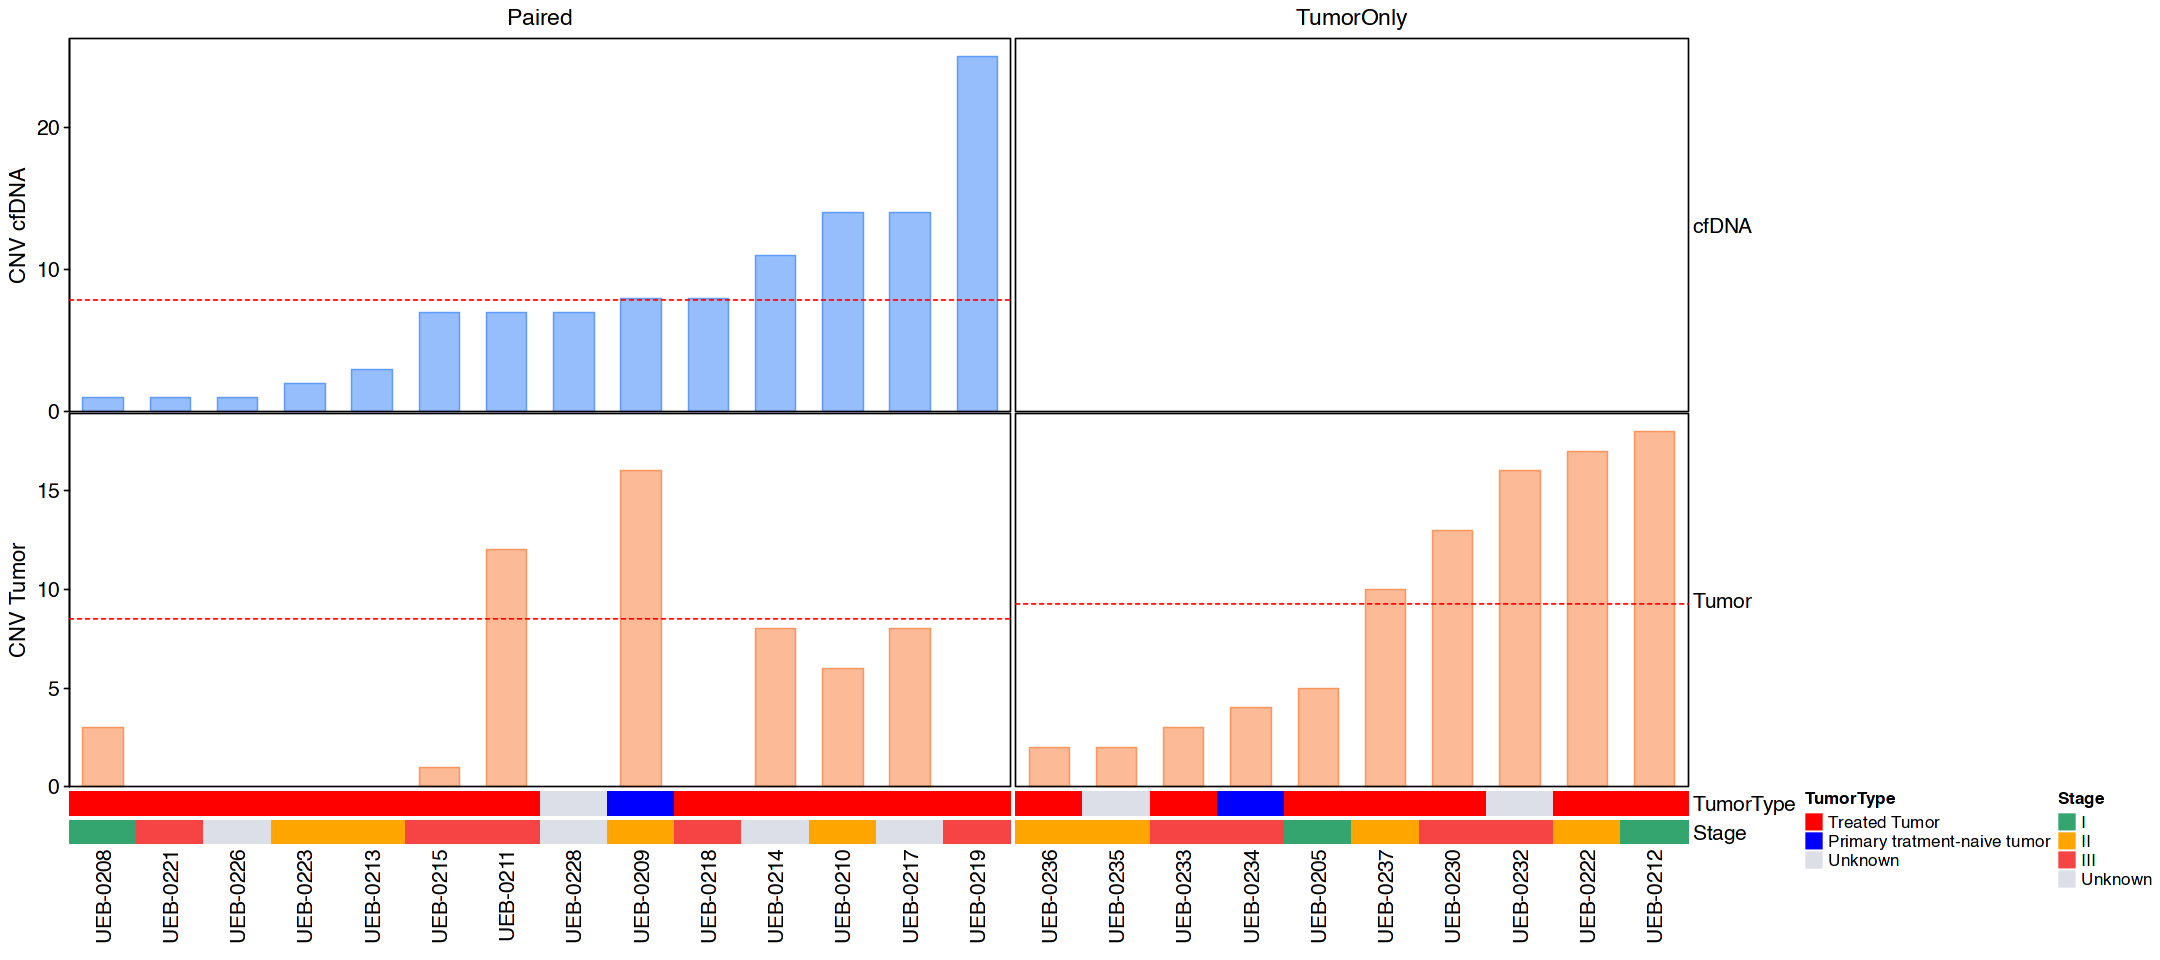

In [10]:
options(repr.plot.width = 18, repr.plot.height = 8)
#pdf("/home/fer/CNV.pdf", width = 18, height = 8)


#===============================Heatmap==============================#

ht = Heatmap(t(m), name = "TumorType",
        column_split = factor(rep(c("Paired", 'TumorOnly'), c(14, 10))),
        col = c('Treated Tumor'='red', 
                'Primary tratment-naive tumor' = 'blue', 'Unknown'="#DCDFE7"),
        
        top_annotation = HeatmapAnnotation(
            
            cfDNA = anno_barplot( 
                                 c(cfDNA), gp = gpar(fill='#2c7afa', col = '#2c7afa', 
                                                     alpha = 0.5),
                                 height = unit(7.9, "cm"), 
                axis_param=list(gp=gpar(fontsize = 12))),
            
            Tumor =  anno_barplot( 
                                  c(tumor), gp = gpar(fill='#fa742c', col = '#fa742c',
                                                     alpha = 0.5),
                                  height = unit(7.9, "cm"), 
                axis_param=list(gp=gpar(fontsize = 12)))
            
       ),
       bottom_annotation = HeatmapAnnotation(Stage = stage, 
                                              col = list(Stage = c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                       'Unknown'="#DCDFE7")
                                            ))
       
       )
#Arriba, izquierda, abajo, derecha 
draw(ht, padding = unit(c(2, 8, 2, 2), "mm")) # add space for legens

decorate_annotation("Tumor", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(0.45), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = 1)

decorate_annotation("Tumor", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(0.49), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = 2)


decorate_annotation("cfDNA", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(0.3), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = 1)


decorate_annotation("cfDNA", {
    grid.text("CNV cfDNA", unit(0, "mm"), just = "left", rot = 90, vjust =-2.8, hjust = 0.5,
    gp=gpar(fontsize=13))},
                    slice = 1)

decorate_annotation("Tumor", {
    grid.text("CNV Tumor", unit(0, "mm"), just = "left", rot = 90, vjust =-2.8, hjust = 0.5,
    gp=gpar(fontsize=13))},
                    slice = 1)

#decorate_annotation("cfDNA", {
#      grid.rect(gp = gpar(fill = "#FCB9B9"))
#    }, slice = 2)


#=============================Decorations===========================#

#dev.off()